## <div style="text-align: center; background-color:#ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> <b>🏡   Home Loan Approval Prediction   🏡</b></div>

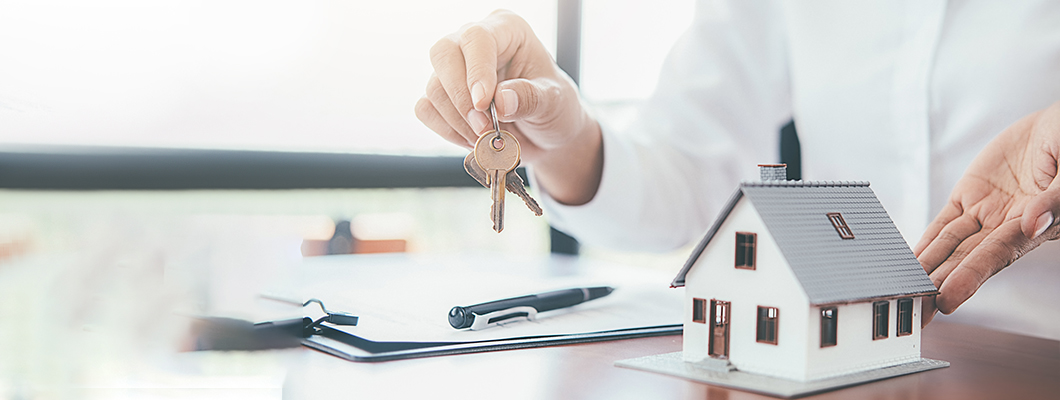

<p style="font-size: 18px;"><b>HomeLoan Overview</b></p>
<p>A home loan, also known as a housing loan or a mortgage, is a type of loan provided by financial institutions, such as banks or housing finance companies, to help individuals or families purchase a house. Home loans are typically long-term loans, ranging from 5 to 30 years, and are secured by the property being purchased.</p>

<p>The loan amount and the interest rate offered by the lender will depend on various factors such as the borrower's income, credit score, employment history, the value of the property, and the down payment made by the borrower. Generally, borrowers are required to make a down payment of 10-20% of the property value and the lender provides the remaining amount as a loan.</p>

<p>When a borrower takes out a home loan, they are required to repay the loan amount along with interest over the loan tenure through monthly installments. Defaulting on home loan payments can lead to penalties and even foreclosure of the property by the lender.</p>

<p>Overall, home loans can help individuals and families achieve their dream of owning a home, but it is important to carefully consider the terms and conditions of the loan and ensure that the monthly repayments are affordable before committing to a loan.</p>



<p style="font-size: 18px;"><b>About Company</b></p>
<p>Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.</p>


<p style="font-size: 18px;"><b>Problem Statement</b></p>
<p>The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.</p>

<a class="anchor" id="toc"></a>
<h1 style = 'text-align: center;font-family : Calibri'> 📙Table of Contents  </h1> 

<div class="list-group" id="list-tab" role="tablist">
   
* [<b>1. 📚Importing Libraries](#1)  
* [<b>2. 📖Reading Datasets from csv files](#2)
* [<b>3. 🗄️Data Preparation</b>](#3)          
* [<b>4. 📊Exploratory Data Analysis</b>](#4)
    - [4.1 👦Analysis - Impact of Gender, Education, Self Employed and Credit History on Loan Status](#4.1)
    - [4.2 🏢Analysis - Impact of Property Area on Loan Approval](#4.2)
    - [4.3 💰Analysis - Impact of Income on Loan Approval](#4.3)
    - [4.4 📅Analysis - Impact of Loan Term on Loan Approval](#4.4)
* [<b>5. 🤖ML Model</b>](#5)
    - [5.1 ⚙️Feature Engineering and Model Building](#5.1)
    - [5.2 ✂️Splitting Data into Train and Test](#5.2)
    - [5.3 🌳Random Forest Classifier Model](#5.3)
    - [5.4 💪Feature Importance](#5.4)
* [<b>6. 📌Conclusion</b>](#6)
* [<b>7. 🏡Thank You🏡</b>](#7)

<a id="1"></a>
# <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 📚Importing Libraries</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import colorama
from colorama import Fore, Back, Style

#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

[🔁Table of Contents🔁](#toc)

<a id="2"></a>
# <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 📖Reading Datasets from csv files</div>

In [2]:
loan_data = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
test_data = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_test.csv')

In [3]:
print(Style.BRIGHT+'Train Data:'+ Style.RESET_ALL)
print(Style.BRIGHT+'-----------'+ Style.RESET_ALL)
loan_data.head().style.set_properties(**{'background-color': '#ffffff' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Train Data:
-----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [4]:
print(Style.BRIGHT+'Test Data:'+ Style.RESET_ALL)
print(Style.BRIGHT+'----------'+ Style.RESET_ALL)
test_data.head().style.set_properties(**{'background-color': '#ffffff' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Test Data:
----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000000,360.000000,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000000,360.000000,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000000,360.000000,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000000,360.000000,nan,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000000,360.000000,1.000000,Urban


In [5]:
print(Style.BRIGHT+ 'Summary of Home Loan Data:' + Style.RESET_ALL)
print(Style.BRIGHT+ '--------------------------' + Style.RESET_ALL)
print(Fore.BLACK+ Style.BRIGHT+ 'Gender' + Style.RESET_ALL+'           :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (Male, Female)')
print(Fore.BLACK+ Style.BRIGHT+ 'Married' + Style.RESET_ALL+'          :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (No, Yes)')
print(Fore.BLACK+ Style.BRIGHT+ 'Dependents' + Style.RESET_ALL+'       :',\
      Fore.RED+ Style.BRIGHT+ str(4) + Style.RESET_ALL + ' (0, 1, 2, 3+)')
print(Fore.BLACK+ Style.BRIGHT+ 'Education' + Style.RESET_ALL+'        :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (Graduate, Not Graduate)')
print(Fore.BLACK+ Style.BRIGHT+ 'Self_Employed' + Style.RESET_ALL+'    :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (No, Yes)')
print(Fore.BLACK+ Style.BRIGHT+ 'Credit_History' + Style.RESET_ALL+'   :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (1, 0)')
print(Fore.BLACK+ Style.BRIGHT+ 'Property_Area' + Style.RESET_ALL+'    :',\
      Fore.RED+ Style.BRIGHT+ str(3) + Style.RESET_ALL + ' (Urban, Rural, Semiurban)')
print(Fore.BLACK+ Style.BRIGHT+ 'Loan_Status' + Style.RESET_ALL+'      :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (Y, N)')

Summary of Home Loan Data:
--------------------------
Gender           : 2 (Male, Female)
Married          : 2 (No, Yes)
Dependents       : 4 (0, 1, 2, 3+)
Education        : 2 (Graduate, Not Graduate)
Self_Employed    : 2 (No, Yes)
Credit_History   : 2 (1, 0)
Property_Area    : 3 (Urban, Rural, Semiurban)
Loan_Status      : 2 (Y, N)


[🔁Table of Contents🔁](#toc)

<a id="3"></a>
# <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 🗄️Data Preparation</div>

In [6]:
loan_data = loan_data.drop('Loan_ID',axis = 1)
#Colors used in the Notebook
colorsy =['#ee4035','#f37736', '#fdf498', '#7bc043', '#0392cf', '#008744', '#0057e7', '#d62d20', '#ffa700']
tricolor=['#7bc043','#0392cf', '#f37736']
doucolor=['#008744','#0057e7']
twocolor=['#7bc043','#f37736']

In [7]:
print(Style.BRIGHT+ 'Checking Null Values:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
print(loan_data.isnull().sum())

Checking Null Values:
---------------------
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
print(Style.BRIGHT+ 'All the Null values are dropped from the Dataset' + Style.RESET_ALL)
print('\n')
print(Style.BRIGHT+ 'Verifying Null Values:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
loan_data.dropna(inplace=True)
loan_data.isnull().sum()

All the Null values are dropped from the Dataset


Verifying Null Values:
---------------------


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

[🔁Table of Contents🔁](#toc)

<a id="4"></a>
# <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 📊Exploratory Data Analysis</div>

<a id="4.1"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 👦Analysis - Impact of Gender, Education, Self Employed and Credit History on Loan Status</div>

In [9]:
Education_loan_data=loan_data[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Gender_loan_data=loan_data[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Self_Employed_loan_data=loan_data[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Credit_History_loan_data=loan_data[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()


for col in ['Education','Gender','Self_Employed','Credit_History']:
  print('\n\n')
  df=col+'_loan_data'
  df = pd.DataFrame(eval(df))
  col_label = col.replace("_", " " )
  fig1=px.bar(data_frame=df, x=col, y='Count', color='Loan_Status', barmode='group', color_discrete_sequence=tricolor, text_auto=True, template='simple_white')

  fig1.update_layout(yaxis_range=[0,350])  
  fig1.update_yaxes(showgrid=True)
  fig1.update_xaxes(showgrid=True)   
    
  fig1.update_layout(height=400,width=800,
      title=f'<b>{col_label} Vs Loan Status</b>',
      font_family="Times New Roman",
      title_font_family="Times New Roman",
      title_font_color="#000000",
      title_font_size=20,
      title_xanchor="center",
      title_x=0.5,
      xaxis_title=f"<b>{col_label}</b>",
      yaxis_title="<b>Count</b>",
      legend_title='<b>Loan Status</b>',
      legend_title_font_color="#000000",
      plot_bgcolor ='#ffffff'
  )


  fig1.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.0;">  

<b>🕵️Observations</b>:  
- In the above plots we see the Loan approval and Rejection cases are nearly similar in case of both Graduate and Non-Graduates. Similarly for Gender and Self-Employed. So, the features  <b style="color:#0392cf;">Gender, Education and Self_Employed</b>  does not have significant impact on the Loan Status.

- For <b style="color:#f37736;">Credit_History</b> we can see the Loan approvals are more in case of Applicants having Credit History. So, this fearue has significant impact on Loan Status

[🔁Table of Contents🔁](#toc)

<a id="4.2"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 🏢Analysis - Impact of Property Area on Loan Approval</div>

In [10]:
pa_loan_df = loan_data[['Property_Area', 'LoanAmount']].groupby(['Property_Area']).agg({'Property_Area':'count', 'LoanAmount':'sum'})
pa_loan_df.columns = [ 'Loan_Count', 'Loan_Amount']
pa_loan_df.reset_index(inplace=True)

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'xy'},{'type':'Domain'}]],
                    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=['<b>Loan Count</b>', '<b>Loan Amount</b>'])



fig.add_trace(go.Bar(x=pa_loan_df['Property_Area'],y=pa_loan_df['Loan_Count'], text=pa_loan_df['Loan_Count'], 
                     marker_color=tricolor ),row=1,col=1)
fig.add_trace(go.Pie(labels=pa_loan_df['Property_Area'], values=pa_loan_df['Loan_Amount'],name='Loan_Amount', 
                     textinfo='percent+label+value', marker_colors=tricolor),row=1,col=2)

fig.update_layout(height=400,width=1000, 
                  title_text="<b>Property Area wise Loan Distribution</b>",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_family="Times New Roman",title_font_color="black",
                  title_font_size=20,
                  showlegend=False,
                  legend_bgcolor='#ffffff',
                  paper_bgcolor='#ffffff',
                  plot_bgcolor = '#ffffff')
fig.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.0;">  

<b>🕵️Observations</b>:  
- HIghest number of loan were applied in <b style="color:#0392cf;">Semi-urban aera</b>, followed by <b style="color:#f37736;">Urban</b> and <b style="color:#f37736;">Rural area</b>.

[🔁Table of Contents🔁](#toc)

In [11]:
fig=px.histogram(loan_data.sort_values('Loan_Status', ascending=True), x='LoanAmount' , 
                 color='Loan_Status', nbins=50, text_auto=True, template='simple_white', 
                 color_discrete_sequence=['#7bc043','#008744'])

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True) 

fig.update_layout(bargap=0)
fig.update_layout(yaxis_range=[0,100])
fig.update_layout(xaxis_range=[0,700])

fig.update_layout(
    title='<b>Loan Amount Distribution (All Areas Togather)</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Amount</b>",
    yaxis_title="<b>Count</b>",
    legend_title='<b>Loan Approved?</b>',
    legend_title_font_color='#000000',
    plot_bgcolor = '#ffffff'
)


In [12]:
for area in ['Urban','Rural','Semiurban'] :
  bins=50
  if area == 'Urban':
    bins=40

  print('\n\n')
  fig=px.histogram(loan_data[loan_data['Property_Area']==area].sort_values('Loan_Status', ascending=True),
                   x='LoanAmount' , color='Loan_Status', nbins=bins, text_auto=True, 
                   template='simple_white', color_discrete_map ={'Y':'#7bc043', 'N':'#f37736'}) 
  fig.update_layout(bargap=0)
  fig.update_layout(yaxis_range=[0,40])
  fig.update_layout(xaxis_range=[0,700])


  fig.update_yaxes(showgrid=True)
  fig.update_xaxes(showgrid=True) 

  fig.update_layout(
      title=f'<b>Loan Amount Distribution - {area} Area</b>',
      font_family="Times New Roman",
      title_font_family="Times New Roman",
      title_font_color="#000000",
      title_font_size=20,
      xaxis_title="<b>Amount</b>",
      yaxis_title="<b>Count</b>",
      legend_title='<b>Loan Approved?</b>',
      legend_title_font_color='#000000',
      plot_bgcolor = '#ffffff'
  )
  fig.show()

In [13]:
fig=px.box(data_frame=loan_data, 
              x='Property_Area',y='LoanAmount',template='simple_white',
              color = 'Loan_Status',
              category_orders={"Loan_Status"  : ['Y','N'],
                                "Property_Area" : ['Urban', 'Semiurban', 'Rural']},
              color_discrete_sequence=doucolor)
fig.update_yaxes(showgrid=True)

fig.update_layout(
    title='<b>Approved And Rejected Loan Amounts across Property Areas</b>',
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Property Area</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Loan Status</b>',
    legend_title_font_color="#000000",
    plot_bgcolor = '#ffffff'
)

fig.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>🕵️Observations</b>:  
- Highest number of loans were applied in <b style="color:#7bc043;">Semi-urban aera</b>, followed by <b style="color:#f37736;">Urban</b> and <b style="color:#f37736;">Rural area</b>.
- Partten of Loan Approval or Rejection is nearly <b style="color:#f37736;">same</b> in all of the three property areas.
- The property area has <b style="color:#7bc043;">little impact</b> on the Loan Approval chances.

[🔁Table of Contents🔁](#toc)

<a id="4.3"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 💰Analysis - Impact of Income on Loan Approval</div>

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>🕵️Observations</b>:
    
Financiers generally considers the Income of the applicant to asses the repayment capacity, before approving a loan request. If there are more than one applicant, then sum of their income will considered for assessing the repayment capacity. So, for our analysis purpose we shall sum up Applicant Income and Co-applicant Income to create a new feature called <b>'Total Income'</b>

In [14]:
loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data = loan_data.drop(['ApplicantIncome','CoapplicantIncome'], axis=1)

fig = px.scatter(loan_data[loan_data['Loan_Status']=='Y'], x="Total_Income", y="LoanAmount",  
                color="Property_Area",  template='simple_white',
                symbol = 'Property_Area', symbol_sequence=['circle', 'square', 'diamond', 'triangle-up'],
                color_discrete_sequence=tricolor, 
                hover_name="Loan_Status",title='<b>Total Income VS Approved Loan Amount</b>')
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_traces(marker=dict(size=8,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Total Income</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Property Area</b>',
    legend_title_font_color="#000000",
    plot_bgcolor = '#ffffff'
)
fig.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>🕵️Observations</b>:  
- The approved loan amount is  <b style="color:#7bc043;">increasing</b> with increase in the  <b style="color:#7bc043;">Total Income</b> of the applicant(s).
- In  <b style="color:#0392cf;">Urban</b> and  <b style="color:#0392cf;">SemiUrban</b> area the approved loan amount is  <b style="color:#f37736;">linaer</b> to the Total income. 
- In  <b style="color:#f37736;">Rural areas</b>, the increase is  <b style="color:#7bc043;">not</b> as linear as SemiUrban and Urban areas. In majority of the cases the Approved loan amount is below 200

[🔁Table of Contents🔁](#toc)

<a id="4.4"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 📅Analysis - Impact of Loan Term on Loan Approval</div>

In [15]:
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype(int)
loan_data2 = loan_data[loan_data['Loan_Status']=='Y'][['Loan_Amount_Term']].groupby('Loan_Amount_Term')\
.agg(Count=('Loan_Amount_Term', 'count')).reset_index()
loan_data2['Loan_Amount_Term'] = loan_data2['Loan_Amount_Term'].astype(int)

fig=px.bar(data_frame=loan_data2, x='Loan_Amount_Term', y='Count', template='simple_white', 
           color = 'Loan_Amount_Term', color_discrete_sequence=colorsy, text_auto='True')

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_layout(yaxis_range=[0,300])

fig.update_layout(title_text="<b>Loan Term wise Count of Approved Loans</b>",
                  title_font_family="Times New Roman",title_font_color="#000000",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  xaxis_title="<b>Loan Term</b>",
                  yaxis_title="<b>Count</b>",
                  legend_title='<b>City Tier</b>',
                  legend_title_font_color="#000000",
                  showlegend=True,
                  plot_bgcolor ='#ffffff')
fig.show()

In [16]:
loan_data3=loan_data[loan_data['Loan_Status']=='Y'].sort_values('Loan_Amount_Term')

fig = px.scatter(loan_data3, x="Loan_Amount_Term", y="Total_Income", size="LoanAmount", color="Property_Area", 
                 template='simple_white',hover_name="LoanAmount",  size_max=60,
                 title='<b> Loan Term Vs Loan Amount Vs Total Salary</b>')
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.5)))

fig.update_layout(xaxis_title="<b>Loan Term</b>",
                  yaxis_title="<b>Applicant Income</b>",
                  legend_title='<b>Property Area</b>',
                  legend_title_font_color="#000000",
                  showlegend=True,
                  plot_bgcolor ='#ffffff')


fig.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>🕵️Observations</b>:  
- Majority of the approved loans are having  <b style="color:#f37736;">Term 360</b>, followed by  <b style="color:#0392cf;">Term 180</b>
- The approved loan amount is increasing with increase in salary, but the majority of the loans are having  <b style="color:#0392cf;">180</b> and  <b style="color:#f37736;">360</b> as Term

[🔁Table of Contents🔁](#toc)

<a id="5"></a>
# <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 🤖ML Model</div>

In [17]:
ml_loan_data = loan_data.copy()

print(Style.BRIGHT+'Data for Model Building:'+ Style.RESET_ALL)
print(Style.BRIGHT+'------------------------'+ Style.RESET_ALL)
ml_loan_data.head().style.set_properties(**{'background-color': '#ffffff' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Data for Model Building:
------------------------


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,Yes,1,Graduate,No,128.000000,360,1.000000,Rural,N,6091.000000
2,Male,Yes,0,Graduate,Yes,66.000000,360,1.000000,Urban,Y,3000.000000
3,Male,Yes,0,Not Graduate,No,120.000000,360,1.000000,Urban,Y,4941.000000
4,Male,No,0,Graduate,No,141.000000,360,1.000000,Urban,Y,6000.000000
5,Male,Yes,2,Graduate,Yes,267.000000,360,1.000000,Urban,Y,9613.000000


<a id="5.1"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> ⚙️Feature Engineering and Model Building</div>

In [18]:
GN_dummies = pd.get_dummies(ml_loan_data['Gender'],prefix="Gender",drop_first=True)
ml_loan_data = ml_loan_data.drop('Gender',axis = 1)
ml_loan_data = ml_loan_data.join(GN_dummies)
ml_loan_data['Married'] = ml_loan_data['Married'].map({'Yes':1, 'No':2})
ml_loan_data['Self_Employed'] = ml_loan_data['Self_Employed'].map({'Yes':1, 'No':2})
ml_loan_data['Education'] = ml_loan_data['Education'].map({'Graduate':1, 'Not Graduate':2})
ml_loan_data['Loan_Status'] = ml_loan_data['Loan_Status'].map({'Y':1, 'N':2})
ml_loan_data['Dependents'] = ml_loan_data['Dependents'].map({'0': 0, '1':1, '2':2, '3+':3})
PA_dummies = pd.get_dummies(ml_loan_data['Property_Area'],prefix="PA",drop_first=True)
ml_loan_data = ml_loan_data.drop('Property_Area',axis = 1)
ml_loan_data = ml_loan_data.join(PA_dummies)

<AxesSubplot:title={'center':'Correlation'}>

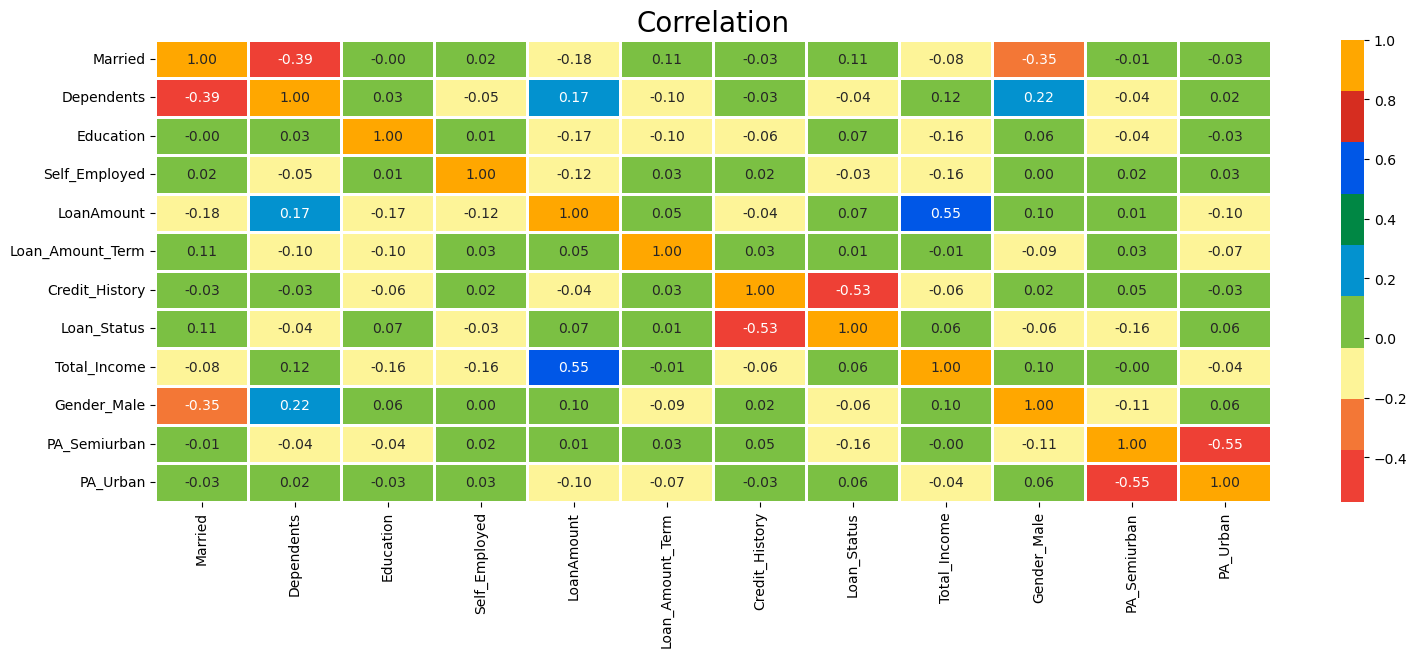

In [19]:
plt.figure(figsize=(18, 6))
plt.title('Correlation', fontsize =20)
sns.heatmap(ml_loan_data.corr(),
            cmap = colorsy,
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<a id="5.2"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> ✂️Splitting Data into Train and Test</div>

In [20]:
X = ml_loan_data.drop('Loan_Status',axis = 1)
y = ml_loan_data['Loan_Status']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

<a id="5.3"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 🌳Random Forest Classifier Model</div>

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [23]:
rfc = RandomForestClassifier(n_estimators=250, random_state=250)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250, random_state=250)

In [24]:
y_pred = rfc.predict(X_test)

In [25]:
accuracy_score(y_pred,y_test)

0.7916666666666666

In [26]:
confusion_matrix(y_pred,y_test)

array([[60, 14],
       [ 6, 16]])

In [27]:
f1_score(y_pred,y_test)

0.8571428571428571

<a id="5.4"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 📈Feature Importance</div>

In [28]:
fi = rfc.feature_importances_

In [29]:
imp_df = pd.DataFrame(fi, columns = ['Imp'], index =X.columns ).reset_index()\
.sort_values('Imp', ascending=False)
imp_df['Imp'] = imp_df['Imp'].round(decimals = 4)
imp_df.columns = ['Features', 'Imp']

fig =px.bar(imp_df, y='Features',x='Imp', orientation='h', color='Features', 
            color_discrete_sequence=colorsy,
            template='simple_white', text_auto='True')
fig.update_layout(
    title='<b>Feature Importance</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Relative Importance</b>",
    yaxis_title="<b>Features</b>",
    legend_title='<b>Features</b>',
    legend_title_font_color="#000000",
                  plot_bgcolor ='#ffffff'
)

fig.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>🕵️Observations</b>:
 <p>The RandomForestClassifier Model has given good results but this can be tuned further to get better results

[🔁Table of Contents🔁](#toc)

<a id="6"></a>
<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>📌Conclusion</b>:  
- The Loan approval and Rejection pattern are nearly same in all of the three Property Areas(Urban, Semi-Urban and Rural Areas).
- Chances of loan approval for higher amounts increase with increase in the tatal income of the applicant(s). 
- Credit History has significant impact on loan approval
- Features Loan_ID, Gender, Married, Dependents, Education, Self_Employed and Property Area has little impact on loan approval.
- Majority of the loans where approved where the Term is 180 or 360

[🔁Table of Contents🔁](#toc)

<a id="7"></a>
## <div style="text-align: center; background-color:#ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> <b>🏡Thank You🏡</b></div>
<div style="text-align: center; background-color: #ffffff;  color: black; font-family: Times New Roman; font-family:15; padding: 14px; line-height: 1.5;">  
 <b>Thank You for taking time to go through the above analysis. Do comment and Upvote if you like my work.</b>